In [89]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.parsing.porter import PorterStemmer
%matplotlib inline

In [26]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skathirmani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/skathirmani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/skathirmani/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Agenda
- Chi-square test
- Text classification
    - Text cleaning
    - Document Term Matrix
    - Text classification using naive bayes algorithm
- Decision Trees

In [5]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
employees = pd.read_csv(url)
employees.shape

(1470, 35)

In [18]:
employees[(employees['Gender']=='Male') &
          (employees['JobRole']=='Research Director')].shape

(47, 35)

In [9]:
obs = pd.crosstab(employees['Gender'], employees['JobRole'])
obs

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Gender,,,,,,,,,
Female,51,16,85,47,72,33,114,132,38
Male,80,36,174,55,73,47,178,194,45


In [11]:
statistic, pvalue, dof, exp = st.chi2_contingency(obs)

In [14]:
pd.DataFrame(exp, columns=obs.columns, index=obs.index)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Gender,,,,,,,,,
Female,52.4,20.8,103.6,40.8,58.0,32.0,116.8,130.4,33.2
Male,78.6,31.2,155.4,61.2,87.0,48.0,175.2,195.6,49.8


In [16]:
# Ho: Gender & JobRole are independent
# Ha: Gender & JobRole are dependent

In [17]:
if pvalue<0.05:
    print('Reject the null hypothesis')
else:
    print('accept the null hypothesis')

Reject the null hypothesis


## Text Mining

## Text data
- Feature extraction (places, names, products, countries, skillsets)
- Sentiment analysis
    - Rule based methods
    - Text classification
    - Hybrid models
- Text classification
    - spam/not spam
    - positive/negative
    - sincere question/insincere question
    - hardware/software/logins
- Topic modelling
    - Equivalent of clustering
    - Politics/scientific/sports/health
- Chat bots (RASA)
- Text summarization (textrank, lexrank, dl models)
- word embeddings

In [21]:
### Text classification -> Naive bayes algorithm
### VADER

In [22]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/imdb_sentiment.csv'
imdb = pd.read_csv(url)
imdb

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [39]:
#analyzer = SentimentIntensityAnalyzer()
#res = analyzer.polarity_scores(imdb.iloc[4]['review'])
#res

### Text cleaning
- lower case conversion
- retain only alphabets
- remove stopwords
- stemming (identify root words)
    - playing, plays, playful, played ---> play

In [43]:
docs = imdb['review'].str.lower().str.replace('[^a-z\s]', '')

In [65]:
stopwords = nltk.corpus.stopwords.words('english')
retain_words = ['not']
stopwords_new = np.setdiff1d(stopwords, retain_words)
#'not' in stopwords

In [57]:
#stemmer = nltk.stem.PorterStemmer()
#stemmer.stem('president')

In [55]:

stemmer = PorterStemmer()
stemmer.stem_documents(['this movie is good',
                        'i do not like this movie'])

['thi movi is good', 'i do not like thi movi']

In [71]:
docs_stemmed = pd.Series(stemmer.stem_documents(docs))

In [72]:
train_x, test_x, train_y, test_y = train_test_split(docs_stemmed,
                                                   imdb['sentiment'],
                                                   test_size=0.2,
                                                   random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((598,), (150,), (598,), (150,))

In [95]:
train_x.head()

487    there ar mani continu error on other user comm...
652    im so sorri but i realli cant recommend it to ...
667    charact ar onedimension even the good gui and ...
537                                       noth new there
194    i think it wa robert ryan best film becaus he ...
dtype: object

In [87]:
vectorizer = CountVectorizer(stop_words=list(stopwords_new),
                            min_df=3).fit(train_x)
vocab = vectorizer.get_feature_names()
len(vocab)

508

In [112]:
dtm_train = vectorizer.transform(train_x)
dtm_test = vectorizer.transform(test_x)

In [111]:
dtm_train = vectorizer.transform(train_x)
df_dtm = pd.DataFrame(dtm_train.toarray(),
                      columns=vocab,
                      index=train_x.index)
df_dtm.head()

,abil,absolut,act,action,actor,actress,actual,ag,almost,along,...,worth,would,wouldnt,write,writer,written,year,yet,youll,young
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Properties of DTM
- High dimension data
- Sparse matrix (95%)
- Column sum -> Term's total frequency
- Row sum -> Document Length (i.e. no. of words in the documents)

In [103]:
(df_dtm==0).sum().sum() / (df_dtm.shape[0] * df_dtm.shape[1]) * 100

98.7181681721223

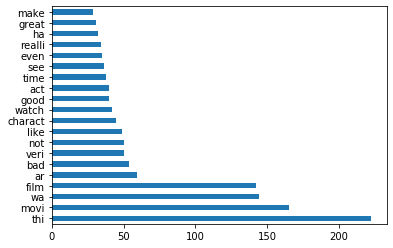

In [106]:
df_dtm.sum().sort_values(ascending=False).head(20).plot.barh()

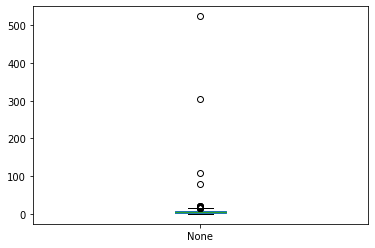

In [109]:
df_dtm.sum(axis=1).plot.box()

In [ ]:
### Exercise: Identify the review which has more than 500 words

In [115]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [116]:
model = MultinomialNB().fit(dtm_train, train_y)
test_y_pred = model.predict(dtm_test)
print(accuracy_score(test_y, test_y_pred))
print(f1_score(test_y, test_y_pred))

0.7866666666666666
0.7974683544303798


### Exercise
- Build a decision tree classifier & report accuracy

In [121]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
from sklearn.tree import DecisionTreeRegressor
employees = pd.read_csv(url)

In [122]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
